In [1]:
import os
from scipy.io import mmwrite
import scanpy as sc
from anndata import AnnData
import pandas as pd
import numpy as np
from scalex.plot import *

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(124)

# %load_ext autoreload
# %autoreload 2
%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rc('font', family='Helvetica')
plt.rcParams['pdf.fonttype'] = 42
sc.set_figure_params(dpi=100, figsize=(4,4), frameon=True, facecolor='w')

## Pancreas

In [19]:
color_map = {
 'acinar': '#1f77b4',
 'activated_stellate': '#ff7f0e',
 'alpha': '#279e68',
 'alpha_er': '#aec7e8',
 'beta': '#aa40fc',
 'beta_er': '#8c564b',
 'delta': '#e377c2',
 'ductal': '#b5bd61',
 'endothelial': '#17becf',
 'epithelial': '#d62728',
 'epsilon': '#ffbb78',
 'gamma': '#98df8a',
 'macrophage': '#ff9896',
 'mast': '#c5b0d5',
 'quiescent_stellate': '#c49c94',
 'schwann': '#f7b6d2',
 'SLC16A7+': '#6B7900',
}

In [20]:
adata = sc.read_h5ad('~/SCALEX/results/transfer/pancreas/adata.h5ad')

#### SCALEX

In [21]:
sc.settings.figdir = '~/SCALEX/figures/pancreas/projection/SCALEX/'

Trying to set attribute `.uns` of view, copying.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


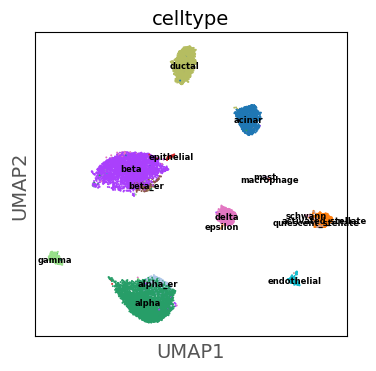

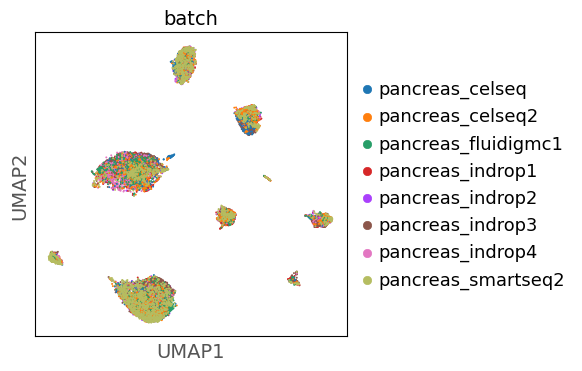

In [22]:
ref = adata[adata.obs['transfer']=='reference'].copy()
palette = [color_map[c] for c in ref.obs['celltype'].cat.categories]
sc.pl.umap(ref, color='celltype', palette=palette, save=None, 
           legend_loc='on data', legend_fontsize=6)
sc.pl.umap(ref, color='batch', save=None)

In [50]:
ref = ['pancreas_indrop3','pancreas_celseq2','pancreas_smartseq2','pancreas_indrop1', 
'pancreas_indrop2','pancreas_indrop4','pancreas_celseq','pancreas_fluidigmc1']

query1 = ps[ps.obs.batch.isin(ref + ['pancreas_gse114297'])]
query2 = ps[ps.obs.batch.isin(ref + ['pancreas_gse81547'])]
query3 = ps[ps.obs.batch.isin(ref + ['pancreas_gse83139'])]

In [51]:
embedding(query1, color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_pancreas_gse114297.pdf')
embedding(query2, color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_pancreas_gse81547.pdf')
embedding(query3, color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_pancreas_gse83139.pdf')

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


#### online_iNMF

In [64]:
sc.settings.figdir = '~/SCALEX/figures/pancreas/projection/online_iNMF/'

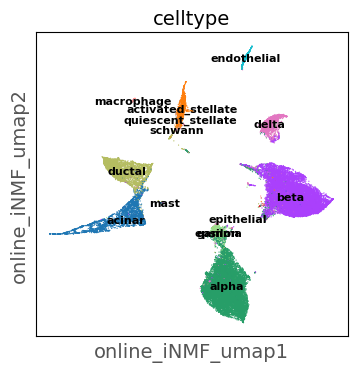

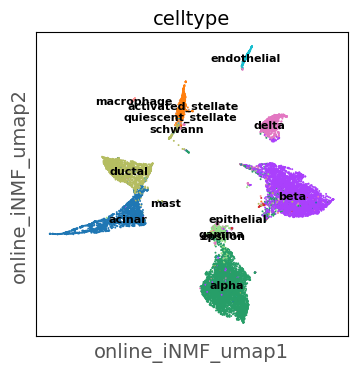

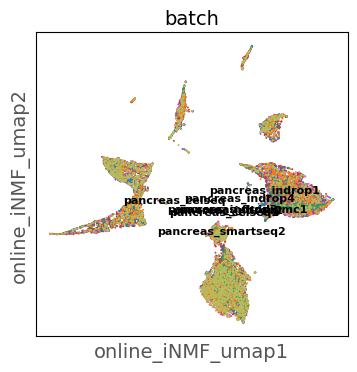

In [65]:
palette = [color_map[i] for i in adata.obs['celltype'].cat.categories]
sc.pl.embedding(adata, 
                basis='online_iNMF_umap',
                color='celltype', 
                legend_loc='on data', 
                palette=palette, 
                legend_fontsize=8, 
                save='_all.pdf')

ref = adata[adata.obs['transfer']=='reference'].copy()
palette = [color_map[i] for i in ref.obs['celltype'].cat.categories]
sc.pl.embedding(ref, 
                basis='online_iNMF_umap',
                color='celltype', 
                legend_loc='on data', 
                legend_fontsize=8, 
                palette=palette, 
                save='_celltype.pdf')

sc.pl.embedding(ref, 
                basis='online_iNMF_umap',
                color='batch', 
                legend_loc='on data', 
                legend_fontsize=8, 
                save='_batch.pdf')

In [66]:
ref = ['pancreas_indrop3','pancreas_celseq2','pancreas_smartseq2','pancreas_indrop1', 'pancreas_indrop2','pancreas_indrop4','pancreas_celseq','pancreas_fluidigmc1']

query1 = adata[adata.obs.batch.isin(ref + ['pancreas_gse114297'])]
query2 = adata[adata.obs.batch.isin(ref + ['pancreas_gse81547'])]
query3 = adata[adata.obs.batch.isin(ref + ['pancreas_gse83139'])]

embedding(query1, basis='online_iNMF_umap',color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_gse114297.pdf')
embedding(query2, basis='online_iNMF_umap',color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_gse81547.pdf')
embedding(query3, basis='online_iNMF_umap',color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_gse83139.pdf')

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


#### scVI

In [9]:
sc.settings.figdir = '~/SCALEX/figures/pancreas/projection/scVI/'

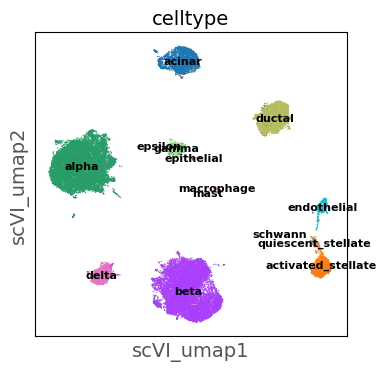

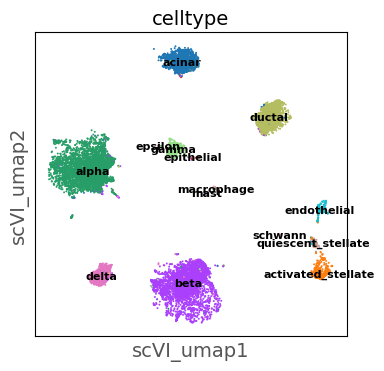

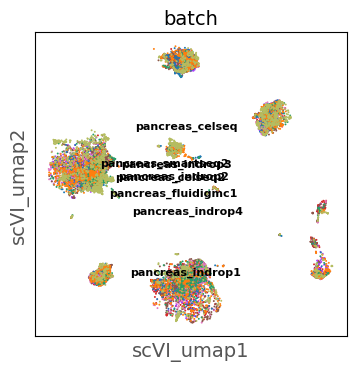

In [68]:
palette = [color_map[i] for i in adata.obs['celltype'].cat.categories]
sc.pl.embedding(adata, 
                basis='scVI_umap',
                color='celltype', 
                legend_loc='on data', 
                palette=palette, 
                legend_fontsize=8, 
                save='_all.pdf')

ref = adata[adata.obs['transfer']=='reference'].copy()
palette = [color_map[i] for i in ref.obs['celltype'].cat.categories]
sc.pl.embedding(ref, 
                basis='scVI_umap',
                color='celltype', 
                legend_loc='on data', 
                legend_fontsize=8, 
                palette=palette, 
                save='_celltype.pdf')

sc.pl.embedding(ref, 
                basis='scVI_umap',
                color='batch', 
                legend_loc='on data', 
                legend_fontsize=8, 
                save='_batch.pdf')

In [69]:
embedding(query1, basis='scVI_umap',color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_gse114297.pdf')
embedding(query2, basis='scVI_umap',color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_gse81547.pdf')
embedding(query3, basis='scVI_umap',color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_gse83139.pdf')

## PBMC

In [55]:
color_map ={ 'B': '#1f77b4',
             'CD4 T': '#ff7f0e',
             'CD4 naive T': '#279e68',
             'CD8 T': '#d62728',
             'CD8 naive T': '#aa40fc',
             'DC': '#8c564b',
             'HSC': '#e377c2',
             'Megakaryocyte': '#b5bd61',
             'NK': '#17becf',
             'monocyte-CD14': '#aec7e8',
             'monocyte-FCGR3A': '#ffbb78',
             'pDC': '#98df8a',
             'CAF': '#aec7e8',
             'Tfh': '#7B4F4B',
             'Treg': '#DDEFFF',
             'endothelial': '#013349',
             'macrophage': '#f7b6d2', 
             'naive T': '#B79762',
             'osteoclast': '#dbdb8d',
             'plasma':'#A079BF',
             'tumor': '#9edae5'
            }

batch_color = {
    'melanoma_gse72056': '#1f77b4',
    'melanoma_gse123139': '#ff7f0e',
    'pbmc_3p': '#279e68',
    'pbmc_5p': '#d62728'
}

In [ ]:
adata = sc.read_h5ad('~/SCALEX/results/transfer/PBMC/adata.h5ad')

#### SCALEX

In [3]:
sc.settings.figdir = '~/SCALEX/figures/PBMC/projection/SCALEX/'

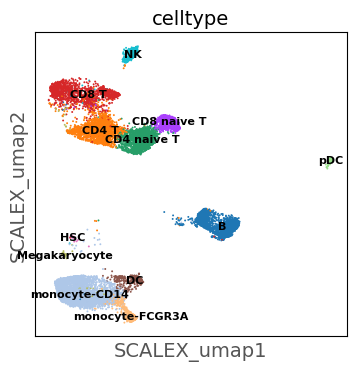

In [61]:
pbmc = adata[adata.obs['transfer']=='reference']
palette = [color_map[i] for i in pbmc.obs['celltype'].cat.categories]
sc.pl.embedding(pbmc, basis='SCALEX_umap', color='celltype', legend_loc='on data', palette=palette, legend_fontsize=8, save='_celltype.pdf')

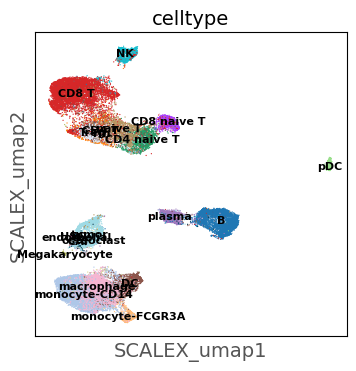

In [60]:
palette = [color_map[i] for i in adata.obs['celltype'].cat.categories]
sc.pl.embedding(adata, basis='SCALEX_umap', color='celltype', legend_loc='on data', palette=palette, legend_fontsize=8, save='_all.pdf')

In [62]:
query1 = adata[adata.obs.batch.isin(['pbmc_3p','pbmc_5p','SKCM_GSE123139'])]
query2 = adata[adata.obs.batch.isin(['pbmc_3p','pbmc_5p','SKCM_GSE72056'])]

In [65]:
embedding(query1, basis='SCALEX_umap', color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_SKCM_GSE123139.pdf')
embedding(query2, basis='SCALEX_umap', color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_SKCM_GSE72056.pdf')

Trying to set attribute `.obs` of view, copying.


#### online_iNMF

In [66]:
sc.settings.figdir = '~/SCALEX/figures/PBMC/projection/online_iNMF/'

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


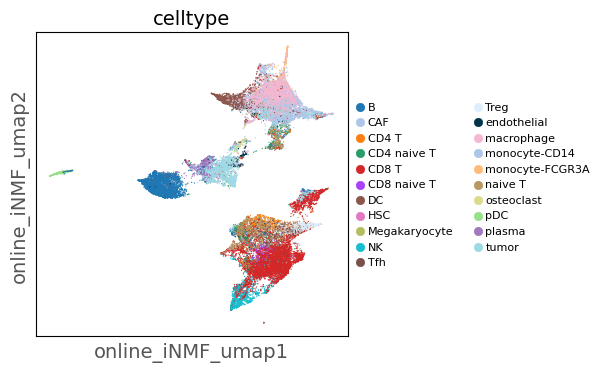

In [67]:
palette = [color_map[i] for i in adata.obs['celltype'].cat.categories]
sc.pl.embedding(adata, 
                basis='online_iNMF_umap',
                color='celltype', 
#                 legend_loc='on data', 
                palette=palette, 
                legend_fontsize=8, 
                save=None)

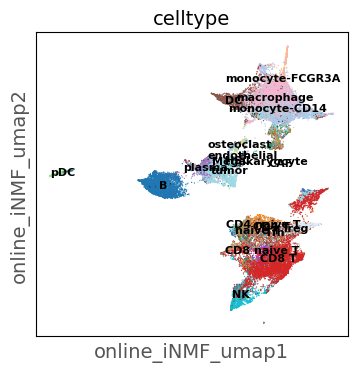

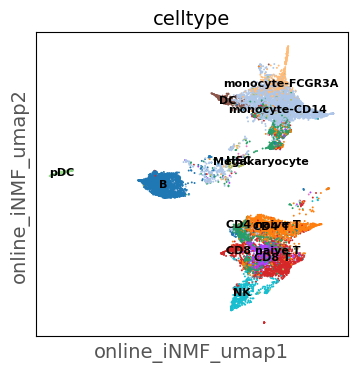

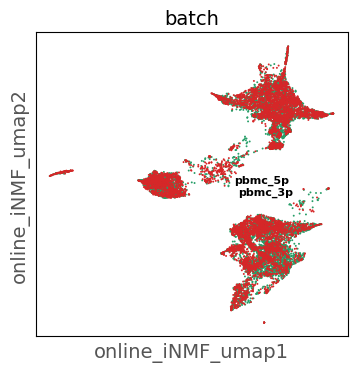

In [68]:
palette = [color_map[i] for i in adata.obs['celltype'].cat.categories]
sc.pl.embedding(adata, 
                basis='online_iNMF_umap',
                color='celltype', 
                legend_loc='on data', 
                palette=palette, 
                legend_fontsize=8, 
                save='_all.pdf')

ref = adata[adata.obs['transfer']=='reference'].copy()
palette = [color_map[i] for i in ref.obs['celltype'].cat.categories]
sc.pl.embedding(ref, 
                basis='online_iNMF_umap',
                color='celltype', 
                legend_loc='on data', 
                legend_fontsize=8, 
                palette=palette, 
                save='_celltype.pdf')

sc.pl.embedding(ref, 
                basis='online_iNMF_umap',
                color='batch', 
                legend_loc='on data', 
                legend_fontsize=8, 
                save='_batch.pdf')

In [69]:
query1 = adata[adata.obs.batch.isin(['pbmc_3p','pbmc_5p','SKCM_GSE123139'])]
query2 = adata[adata.obs.batch.isin(['pbmc_3p','pbmc_5p','SKCM_GSE72056'])]

embedding(query1, basis='online_iNMF_umap',color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_SKCM_GSE123139.pdf')
embedding(query2, basis='online_iNMF_umap',color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_SKCM_GSE72056.pdf')

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


#### scVI

In [70]:
sc.settings.figdir = '~/SCALEX/figures/PBMC/projection/scVI/'

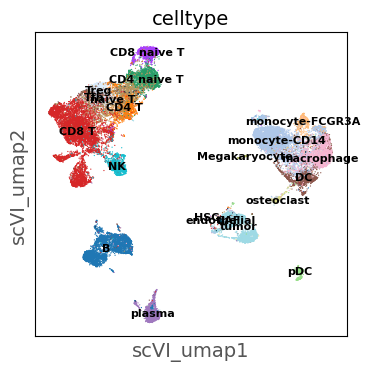

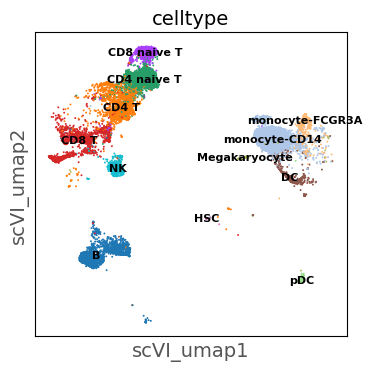

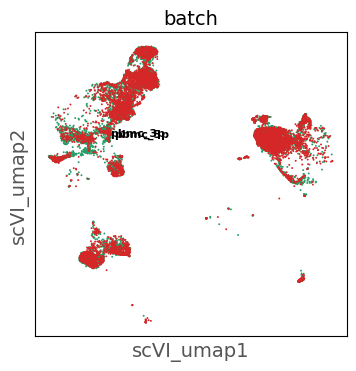

In [71]:
palette = [color_map[i] for i in adata.obs['celltype'].cat.categories]
sc.pl.embedding(adata, 
                basis='scVI_umap',
                color='celltype', 
                legend_loc='on data', 
                palette=palette, 
                legend_fontsize=8, 
                save='_all.pdf')

ref = adata[adata.obs['transfer']=='reference'].copy()
palette = [color_map[i] for i in ref.obs['celltype'].cat.categories]
sc.pl.embedding(ref, 
                basis='scVI_umap',
                color='celltype', 
                legend_loc='on data', 
                legend_fontsize=8, 
                palette=palette, 
                save='_celltype.pdf')

sc.pl.embedding(ref, 
                basis='scVI_umap',
                color='batch', 
                legend_loc='on data', 
                legend_fontsize=8, 
                save='_batch.pdf')

In [73]:
embedding(query1, basis='scVI_umap',color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_SKCM_GSE123139.pdf')
embedding(query2, basis='scVI_umap',color='celltype', groupby='transfer', legend_loc='on data', legend_fontsize=8, color_map=color_map, save='_SKCM_GSE72056.pdf')